In [47]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


In [39]:
#load the uploaded file
df=pd.read_csv('/content/drive/MyDrive/fake_jobs.csv')


In [40]:
print(df.head())
print(df.info())

   title_length  description_length  has_company_profile is_fake
0            72                 740                    1     yes
1            95                 476                    0      no
2            60                 662                    1     yes
3            34                 317                    0      no
4            67                 884                    0     yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title_length         100 non-null    int64 
 1   description_length   100 non-null    int64 
 2   has_company_profile  100 non-null    int64 
 3   is_fake              100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None


In [51]:
print(df.shape)

(100, 4)


In [52]:
print(df.describe())# Provides statistical summary including mean, standard deviation, min, and max values

       title_length  description_length  has_company_profile
count    100.000000          100.000000           100.000000
mean      53.550000          546.380000             0.440000
std       26.158945          274.497733             0.498888
min       10.000000           61.000000             0.000000
25%       30.250000          320.750000             0.000000
50%       58.500000          552.500000             0.000000
75%       72.000000          779.500000             1.000000
max       99.000000          971.000000             1.000000


In [42]:
# Features: title_length, description_length, has_company_profile
X = df[['title_length', 'description_length', 'has_company_profile']]

# Target: is_fake
y = df['is_fake'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert 'yes'/'no' to 1/0


In [43]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased iterations if convergence is an issue
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [49]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.47
Precision: 0.60
Recall: 0.33


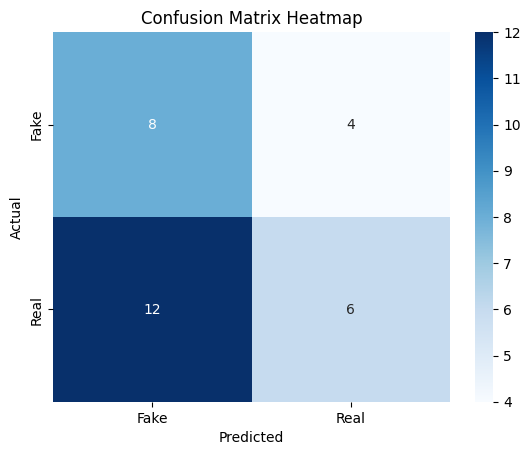

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()
